<a href="https://colab.research.google.com/github/hxtruong/fb-developer-circles/blob/master/Assignment_Week_4_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Information 
- Hoang Xuan Truong

## Tasks
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

# Find something fun about TED Talks

### Intro
TED Talks was founded in 1984 by Richard Saulman. It is place for peole share the incredible ideas about *Technology*, *Entertainment* and *Design* to everyone.

![TED Talks logo](https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/TED.gif)

In recent years, the number of video is organized by TED Talks which is 
increasing in many countries, include of Vietnam. Althought these video are shared by experts from theirs field, I just want to watch the highest quality TED Talks videos in the valuable videos.

### Purpose

1.   Finding the highest quality videos to watching
    
    The question is 
    * How to know which video is high quality? 
    * Which factors affect on the quality? 
2.   Checking the highest view videos is true in 20/80 rule
3. Predicting the trend video in fields (Tech, Entertainment or Design) via number of videos

## What data we have? 
*(Refer kaggle)*
#### Dataset contains two `csv` files:
 
 - ted_main.csv : Contains data on actual TED Talk metadata and TED Talk speakers
 - transcripts.csv : Contains transcript and URL information for TED Talks

### Columns in data
#### ted_main.csv
 - name: The official name of the TED Talk. Includes the title and the speaker.
 - title: The title of the talk
 - description: A blurb of what the talk is about.
 - main_speaker: The first named speaker of the talk.
 - speaker_occupation: The occupation of the main speaker.
 - num_speaker: The number of speakers in the talk.
 - duration: The duration of the talk in seconds.
 - event: The TED/TEDx event where the talk took place.
 - film_date: The Unix timestamp of the filming.
 - published_date: The Unix timestamp for the publication of the talk on TED.com
 - comments: The number of first level comments made on the talk.
 - tags: The themes associated with the talk.
 - languages: The number of languages in which the talk is available.
 - ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
 - related_talks: A list of dictionaries of recommended talks to watch next.
 - url: The URL of the talk.
 - views: The number of views on the talk.

#### transcripts.csv
 - transcript: The official English transcript of the talk.
 - url: The URL of the talk

### Load Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

I load `ted_main.csv` at first.

In [0]:
# Load the Dataset
link = "https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/ted_main.csv"
# transcription_link = "https://raw.githubusercontent.com/hxtruong/dataset/master/ted-talks/transcripts.csv"
df = pd.read_csv(link, skipinitialspace=True)

### Quick Analysis on Dataset

In [3]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\n-----\nRows and Columns:")
    print(df.shape)
    print("\n-----\nColumn names:")
    print(df.columns)
    print("\n-----\nPercent Null Values")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("\n-----\nUnique values")
    print(df.nunique())

quick_analysis(df)

Data Types:
comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

-----
Rows and Columns:
(2550, 17)

-----
Column names:
Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

-----
Percent Null Values
comments              0.000000
description           0.000000
duration              0.000000
event                 0.000000
film_dat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


**>Comment**

From information above:
  - Dataset have 6 *`null`* `speaker_occupation` values.
  - Data is clean enough to exploring

##### Show 5 random videos in dataset

In [5]:
df.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1485,235,"As machines take on more jobs, many find thems...",716,TED2013,1361836800,27,Erik Brynjolfsson,Erik Brynjolfsson: The key to growth? Race wit...,1,1366729421,"[{'id': 3, 'name': 'Courageous', 'count': 38},...","[{'id': 1556, 'hero': 'https://pe.tedcdn.com/i...",Innovation researcher,"['business', 'economics', 'technology', 'work']",The key to growth? Race with the machines,https://www.ted.com/talks/erik_brynjolfsson_th...,1200139
647,180,Planetary scientist Joel Levine shows some int...,974,TEDxNASA,1258675200,25,Joel Levine,Joel Levine: Why we need to go back to Mars,1,1269507540,"[{'id': 9, 'name': 'Ingenious', 'count': 133},...","[{'id': 141, 'hero': 'https://pe.tedcdn.com/im...",Planetary and atmospheric scientist,"['Mars', 'Planets', 'TEDx', 'exploration', 'li...",Why we need to go back to Mars,https://www.ted.com/talks/joel_levine\n,622046
383,147,MIT grad student David Merrill demos Siftables...,429,TED2009,1233878400,29,David Merrill,David Merrill: Toy tiles that talk to each other,1,1234431300,"[{'id': 9, 'name': 'Ingenious', 'count': 824},...","[{'id': 350, 'hero': 'https://pe.tedcdn.com/im...",MIT grad student,"['art', 'business', 'children', 'computers', '...",Toy tiles that talk to each other,https://www.ted.com/talks/david_merrill_demos_...,1765153
523,185,Many people think the lines on the map no long...,1133,TEDGlobal 2009,1248307200,26,Parag Khanna,Parag Khanna: Mapping the future of countries,1,1254099600,"[{'id': 22, 'name': 'Fascinating', 'count': 33...","[{'id': 604, 'hero': 'https://pe.tedcdn.com/im...",Global strategist,"['Asia', 'economics', 'global issues', 'histor...",Mapping the future of countries,https://www.ted.com/talks/parag_khanna_maps_th...,935859
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


##### Change time to easy understand

In [0]:
from datetime import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [7]:
df.loc[:3, ['title', 'film_date', 'published_date']]

,title,film_date,published_date
0,Do schools kill creativity?,25-02-2006,27-06-2006
1,Averting the climate crisis,25-02-2006,27-06-2006
2,Simplicity sells,24-02-2006,27-06-2006
3,Greening the ghetto,26-02-2006,27-06-2006


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


##### Swap columns for easily explore

In [9]:
cols = df.columns
cols = ['name', 'title', 'main_speaker', 'duration', 'views', 'comments', 
        'description', 'event', 'film_date','published_date',
        'languages',  'num_speaker', 'ratings', 'related_talks', 
        'speaker_occupation', 'tags', 'url']
df = df.reindex(columns=cols)
df.columns

Index(['name', 'title', 'main_speaker', 'duration', 'views', 'comments',
       'description', 'event', 'film_date', 'published_date', 'languages',
       'num_speaker', 'ratings', 'related_talks', 'speaker_occupation', 'tags',
       'url'],
      dtype='object')

In [10]:
df.head(2)

,name,title,main_speaker,duration,views,comments,description,event,film_date,published_date,languages,num_speaker,ratings,related_talks,speaker_occupation,tags,url
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,1164,47227110,4553,Sir Ken Robinson makes an entertaining and pro...,TED2006,25-02-2006,27-06-2006,60,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,977,3200520,265,With the same humor and humanity he exuded in ...,TED2006,25-02-2006,27-06-2006,43,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",https://www.ted.com/talks/al_gore_on_averting_...


##### Describe dataset

In [11]:
df.describe()

,duration,views,comments,languages,num_speaker
count,2550.000000,2.550000e+03,2550.000000,2550.000000,2550.000000
mean,826.510196,1.698297e+06,191.562353,27.326275,1.028235
std,374.009138,2.498479e+06,282.315223,9.563452,0.207705
min,135.000000,5.044300e+04,2.000000,0.000000,1.000000
25%,577.000000,7.557928e+05,63.000000,23.000000,1.000000
50%,848.000000,1.124524e+06,118.000000,28.000000,1.000000
75%,1046.750000,1.700760e+06,221.750000,33.000000,1.000000
max,5256.000000,4.722711e+07,6404.000000,72.000000,5.000000


### Data Manuplation in the Dataset

In dataset, I realize that `name` is combined `title` and `main_speaker` which is not nessersary.

In [12]:
df.head(1)

,name,title,main_speaker,duration,views,comments,description,event,film_date,published_date,languages,num_speaker,ratings,related_talks,speaker_occupation,tags,url
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,1164,47227110,4553,Sir Ken Robinson makes an entertaining and pro...,TED2006,25-02-2006,27-06-2006,60,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",https://www.ted.com/talks/ken_robinson_says_sc...


In [13]:
(df['name'] == df['main_speaker']+ ": " + df['title']).value_counts()

True     2541
False       9
dtype: int64

There are 9 `name` is not combined by `speaker` and `title`

In [14]:
df[df['name'] != df['main_speaker']+ ": " + df['title']][['name', 'title', 'main_speaker']]

,name,title,main_speaker
898,Patricia Ryan: Don't insist on English!,Don't insist on English!,Patricia Ryan
1543,The interspecies internet? An idea in progress,The interspecies internet? An idea in progress,"Diana Reiss, Peter Gabriel, Neil Gershenfeld a..."
1549,Two young scientists break down plastics with ...,Two young scientists break down plastics with ...,Miranda Wang and Jeanny Yao
1745,Tristram Wyatt: The smelly mystery of the huma...,The smelly mystery of the human pheromone,Tristram Wyatt
1768,"Anne Curzan: What makes a word ""real""?","What makes a word ""real""?",Anne Curzan
1769,Ruth Chang: How to make hard choices,How to make hard choices,Ruth Chang
1845,Susan Etlinger: What do we do with all this bi...,What do we do with all this big data?,Susan Etlinger
2466,Michael Bierut: How to design a library that m...,How to design a library that makes kids want t...,Michael Bierut
2512,Jack Conte: How artists can (finally) get paid...,How artists can (finally) get paid in the digi...,Jack Conte


After see the difference, that is not special. So it should drop `name` columns.

In [0]:
df.drop(columns=['name'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 16 columns):
title                 2550 non-null object
main_speaker          2550 non-null object
duration              2550 non-null int64
views                 2550 non-null int64
comments              2550 non-null int64
description           2550 non-null object
event                 2550 non-null object
film_date             2550 non-null object
published_date        2550 non-null object
languages             2550 non-null int64
num_speaker           2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
url                   2550 non-null object
dtypes: int64(5), object(11)
memory usage: 318.8+ KB


## 1. Finding the highest quality TED Talks videos

#### **> Comment**

- The quality video should be had **high views**. The number of views indicate the popular of that video which tell other that this video has quality content, so it will attractive many people.

> Top **15 videos** has the highest views

In [24]:
view_sorted_talks = df[['title', 'main_speaker','url', 'film_date', 'views']].sort_values(by=['views'], ascending=False)
view_sorted_talks[:15]

,title,main_speaker,url,film_date,views
0,Do schools kill creativity?,Ken Robinson,https://www.ted.com/talks/ken_robinson_says_sc...,25-02-2006,47227110
1346,Your body language may shape who you are,Amy Cuddy,https://www.ted.com/talks/amy_cuddy_your_body_...,26-06-2012,43155405
677,How great leaders inspire action,Simon Sinek,https://www.ted.com/talks/simon_sinek_how_grea...,17-09-2009,34309432
837,The power of vulnerability,Brené Brown,https://www.ted.com/talks/brene_brown_on_vulne...,06-06-2010,31168150
452,10 things you didn't know about orgasm,Mary Roach,https://www.ted.com/talks/mary_roach_10_things...,06-02-2009,22270883
1776,How to speak so that people want to listen,Julian Treasure,https://www.ted.com/talks/julian_treasure_how_...,10-06-2013,21594632
201,My stroke of insight,Jill Bolte Taylor,https://www.ted.com/talks/jill_bolte_taylor_s_...,27-02-2008,21190883
5,Why we do what we do,Tony Robbins,https://www.ted.com/talks/tony_robbins_asks_wh...,02-02-2006,20685401
2114,This is what happens when you reply to spam email,James Veitch,https://www.ted.com/talks/james_veitch_this_is...,08-12-2015,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,https://www.ted.com/talks/cameron_russell_look...,27-10-2012,19787465


> Diplay view of video on chart

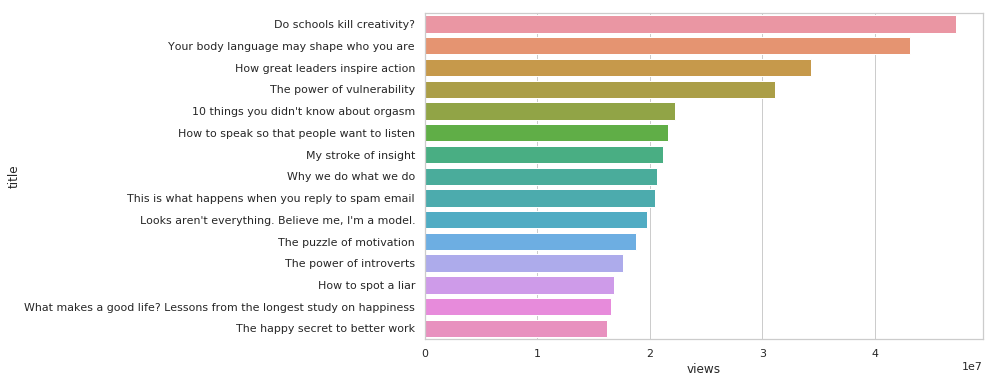

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='views', y='title', data=view_sorted_talks[:15])

> Beside, I display the distibution of the views in TED Talks

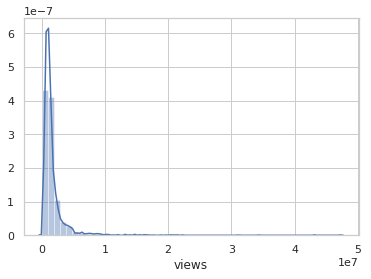

In [63]:
sns.distplot(df['views'])

In [73]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

> The average number of views on videos is **1.6** million views.

#### > Comment
- A quality TED Talk will take attention of viewers. So these videos should have many **comments**

> Top 15 videos has high number comments

In [78]:
cmt_sorted_talks = df[['title', 'main_speaker','url', 'comments', 'film_date', 'views']].sort_values(by=['comments'], ascending=False)
cmt_sorted_talks[:15]

,title,main_speaker,url,comments,film_date,views
96,Militant atheism,Richard Dawkins,https://www.ted.com/talks/richard_dawkins_on_m...,6404,02-02-2002,4374792
0,Do schools kill creativity?,Ken Robinson,https://www.ted.com/talks/ken_robinson_says_sc...,4553,25-02-2006,47227110
644,Science can answer moral questions,Sam Harris,https://www.ted.com/talks/sam_harris_science_c...,3356,11-02-2010,3433437
201,My stroke of insight,Jill Bolte Taylor,https://www.ted.com/talks/jill_bolte_taylor_s_...,2877,27-02-2008,21190883
1787,How do you explain consciousness?,David Chalmers,https://www.ted.com/talks/david_chalmers_how_d...,2673,18-03-2014,2162764
954,Taking imagination seriously,Janet Echelman,https://www.ted.com/talks/janet_echelman\n,2492,03-03-2011,1832930
840,On reading the Koran,Lesley Hazleton,https://www.ted.com/talks/lesley_hazelton_on_r...,2374,10-10-2010,1847256
1346,Your body language may shape who you are,Amy Cuddy,https://www.ted.com/talks/amy_cuddy_your_body_...,2290,26-06-2012,43155405
661,The danger of science denial,Michael Specter,https://www.ted.com/talks/michael_specter_the_...,2272,11-02-2010,1838628
677,How great leaders inspire action,Simon Sinek,https://www.ted.com/talks/simon_sinek_how_grea...,1930,17-09-2009,34309432


> The chart show comments count

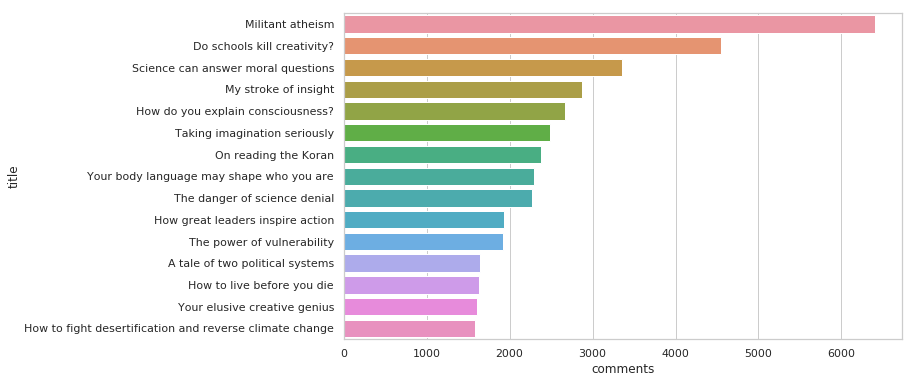

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x='comments', y='title', data=cmt_sorted_talks[:15])

> Merge data view and comment